In [3]:
pip install xlrd


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

# Specify the file path (use raw string or double backslashes)
df = pd.read_csv(r"C:\Users\DhruviJayPatel\Downloads\FINAL_Sarcasm.xls")

# Check the first few rows to confirm the data loaded successfully
print(df.head())


            Source Created At           Author ID  \
0  2020-09-18 21:56:20.798000           593731316   
1  2020-10-13 07:31:53.122000  745583289520496640   
2  2020-10-26 19:27:24.695000           303134761   
3  2020-10-26 19:28:49.281000           303134761   
4  2020-09-28 11:59:41.212000            56427671   

                                          Tweet Text    Source Language  \
0  @DSisourath The Thameslink core between London...  sprinklr       en   
1  @DulwichHistory Loving the complaint about peo...  sprinklr       en   
2  @SW_Help .And yet you have no toilets on some ...  sprinklr       en   
3  @SW_Help you have no toilets on some of your t...  sprinklr       en   
4  @SpeedySticks007 @MrNeilJH @TLRailUK @christia...  sprinklr       en   

   Longitude  Latitude                              Tweet ID    Topic  \
0   -0.12574  51.50853  acd7673f-e621-5f1a-d662-df278964a6ea  service   
1   -0.12574  51.50853  5b92aba8-4b05-6c63-8485-e9c870742137   delays   
2   -0.1257

In [7]:
# KPI Calculations

# 1. Sentiment Distribution
sentiment_counts = df['predicted_sentiment'].value_counts(normalize=True) * 100
sentiment_counts = sentiment_counts.reset_index()
sentiment_counts.columns = ['Sentiment', 'Percentage']


In [8]:
# 2. Sarcasm Distribution
sarcasm_counts = df['sarcastic'].value_counts(normalize=True) * 100
sarcasm_counts = sarcasm_counts.reset_index()
sarcasm_counts.columns = ['Sarcasm', 'Percentage']


In [9]:
# 3. Emotion Distribution
emotion_counts = df['predicted_emotion'].value_counts(normalize=True) * 100
emotion_counts = emotion_counts.reset_index()
emotion_counts.columns = ['Emotion', 'Percentage']


In [10]:
# 4. Topics Distribution
topic_counts = df['Topic'].value_counts(normalize=True) * 100
topic_counts = topic_counts.reset_index()
topic_counts.columns = ['Topic', 'Percentage']


In [11]:
# 5. Sentiment Accuracy
sentiment_accuracy = (df['true_sentiment'] == df['predicted_sentiment']).mean() * 100


In [12]:
# 6. Tweets per Location
location_counts = df.groupby(['Longitude', 'Latitude']).size().reset_index(name='Tweet_Count')


In [13]:
# 7. Sarcasm and Sentiment Correlation
sarcasm_sentiment = df[df['sarcastic'] == 1]['predicted_sentiment'].value_counts(normalize=True) * 100
sarcasm_sentiment = sarcasm_sentiment.reset_index()
sarcasm_sentiment.columns = ['Sentiment', 'Percentage']

In [14]:
# 8. Average Sarcasm Score
average_sarcasm_score = df['sarcasm_score'].mean()

In [15]:
# 9. Topic-wise Sentiment Breakdown
topic_sentiment = df.groupby('Topic')['predicted_sentiment'].value_counts(normalize=True).unstack() * 100
topic_sentiment = topic_sentiment.reset_index()

In [17]:
import pandas as pd

# Fixing datetime parsing
try:
    df['timestamp'] = pd.to_datetime(df['Source Created At'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
except Exception as e:
    print("Error in datetime parsing:", e)
    df['timestamp'] = pd.to_datetime(df['Source Created At'], errors='coerce')  # Use fallback for mixed formats

# Handle any rows where 'timestamp' couldn't be parsed
df = df.dropna(subset=['timestamp'])

# Proceed with the time-based sentiment trend analysis
time_sentiment = df.groupby(df['timestamp'].dt.date)['predicted_sentiment'].value_counts(normalize=True).unstack() * 100
time_sentiment = time_sentiment.reset_index()

print(time_sentiment.head())


predicted_sentiment   timestamp   negative    neutral   positive
0                    2019-01-16  55.714286  35.714286   8.571429
1                    2019-01-17  59.000000  35.000000   6.000000
2                    2019-01-18  56.896552  32.758621  10.344828
3                    2019-01-19  40.000000  46.666667  13.333333
4                    2019-01-20  52.631579  47.368421        NaN


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your final DataFrame with all necessary columns

# 1. Distribution of Sentiments
def plot_sentiment_distribution(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(x='predicted_sentiment', data=df, palette='viridis')
    plt.title('Distribution of Sentiments')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

# 2. Sentiment by Topics
def plot_sentiment_by_topics(df):
    topic_sentiment = df.groupby(['Topic', 'predicted_sentiment']).size().unstack(fill_value=0)
    topic_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title('Sentiment by Topics')
    plt.ylabel('Count')
    plt.xlabel('Topic')
    plt.legend(title='Sentiment')
    plt.show()

# 3. Average Sentiment Confidence
def plot_sentiment_confidence(df):
    avg_confidence = df.groupby('predicted_sentiment')['Confidence Level'].mean()
    avg_confidence.plot(kind='bar', figsize=(8, 5), color='skyblue')
    plt.title('Average Sentiment Confidence Level')
    plt.ylabel('Average Confidence Level')
    plt.xlabel('Sentiment')
    plt.show()

# 4. Source-Based Sentiment Distribution
def plot_source_based_sentiment(df):
    source_sentiment = df.groupby(['Source', 'predicted_sentiment']).size().unstack(fill_value=0)
    source_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title('Sentiment Distribution by Source')
    plt.ylabel('Count')
    plt.xlabel('Source')
    plt.legend(title='Sentiment')
    plt.show()

# 5. Time-Based Sentiment Trends
def plot_time_based_sentiment(df):
    df['timestamp'] = pd.to_datetime(df['Source Created At'], errors='coerce')
    df = df.dropna(subset=['timestamp'])
    time_sentiment = df.groupby(df['timestamp'].dt.date)['predicted_sentiment'].value_counts(normalize=True).unstack() * 100
    time_sentiment.plot(figsize=(24, 12))
    plt.title('Time-Based Sentiment Trends')
    plt.ylabel('Percentage')
    plt.xlabel('Date')
    plt.legend(title='Sentiment')
    plt.show()

# 6. Source-Based Sentiment Confidence
def plot_source_based_confidence(df):
    source_confidence = df.groupby('Source')['Confidence Level'].mean()
    source_confidence.plot(kind='bar', figsize=(8, 5), color='teal')
    plt.title('Average Confidence Level by Source')
    plt.ylabel('Confidence Level')
    plt.xlabel('Source')
    plt.show()

# Visualize All KPIs
print("Visualizing all KPIs...")



Visualizing all KPIs...


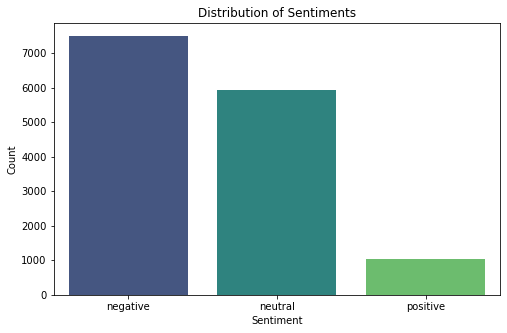

In [21]:
plot_sentiment_distribution(df)        # Distribution of Sentiments


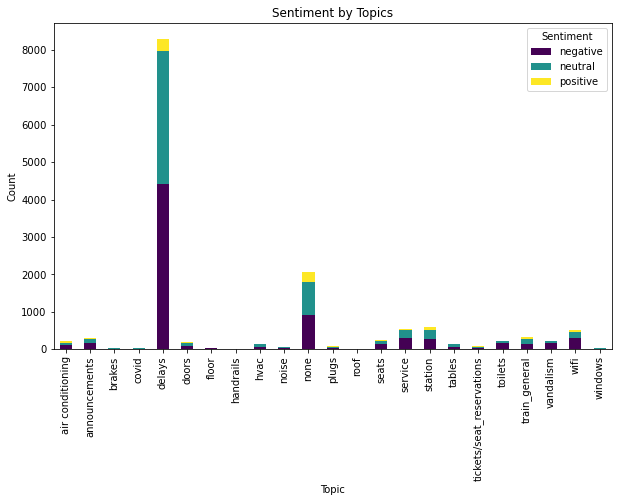

In [22]:
plot_sentiment_by_topics(df)           # Sentiment by Topics


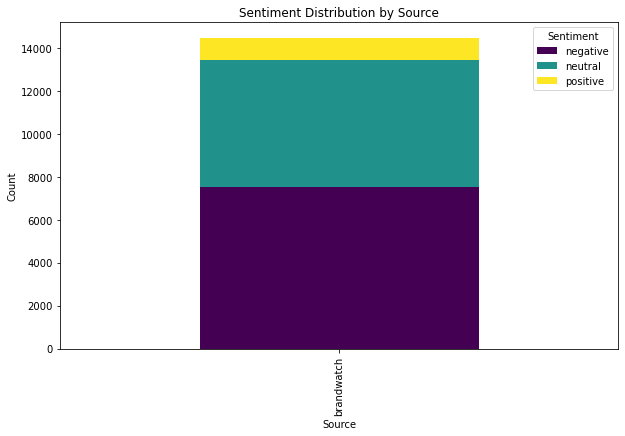

In [24]:
plot_source_based_sentiment(df)        # Source-Based Sentiment Distribution


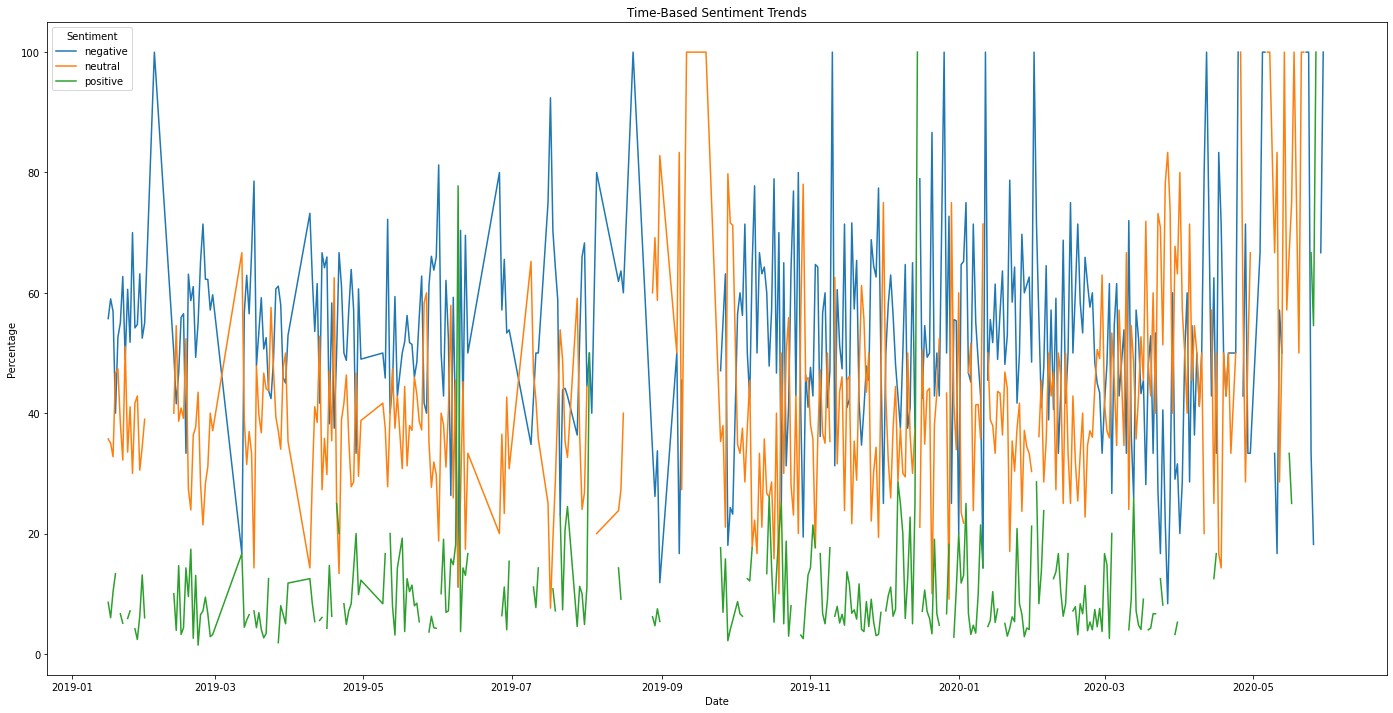

In [29]:
plot_time_based_sentiment(df)          # Time-Based Sentiment Trends


In [18]:
# Export to Excel or CSV for Power BI
with pd.ExcelWriter("PowerBI_KPIs.xlsx") as writer:
    sentiment_counts.to_excel(writer, sheet_name='Sentiment Distribution', index=False)
    sarcasm_counts.to_excel(writer, sheet_name='Sarcasm Distribution', index=False)
    emotion_counts.to_excel(writer, sheet_name='Emotion Distribution', index=False)
    topic_counts.to_excel(writer, sheet_name='Topic Distribution', index=False)
    location_counts.to_excel(writer, sheet_name='Location Counts', index=False)
    sarcasm_sentiment.to_excel(writer, sheet_name='Sarcasm Sentiment', index=False)
    topic_sentiment.to_excel(writer, sheet_name='Topic Sentiment', index=False)
    time_sentiment.to_excel(writer, sheet_name='Time Sentiment Trends', index=False)
    # Save overall metrics as a summary
    pd.DataFrame({'Metric': ['Sentiment Accuracy', 'Average Sarcasm Score'],
                  'Value': [sentiment_accuracy, average_sarcasm_score]}).to_excel(writer, sheet_name='Summary Metrics', index=False)

print("Exported KPIs to PowerBI_KPIs.xlsx")


Exported KPIs to PowerBI_KPIs.xlsx


Visualizing KPIs...


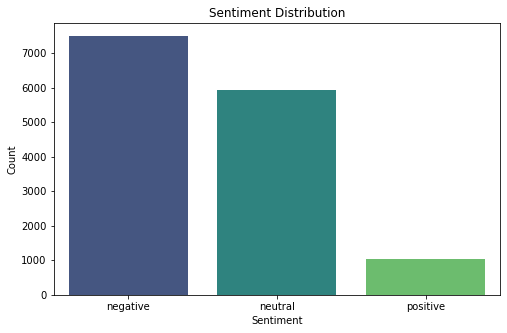

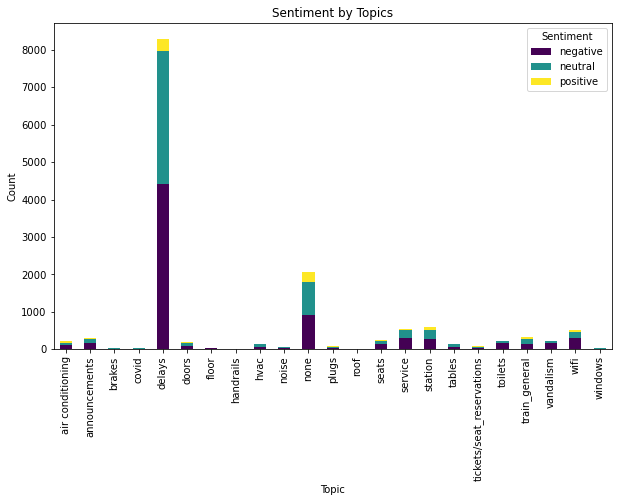

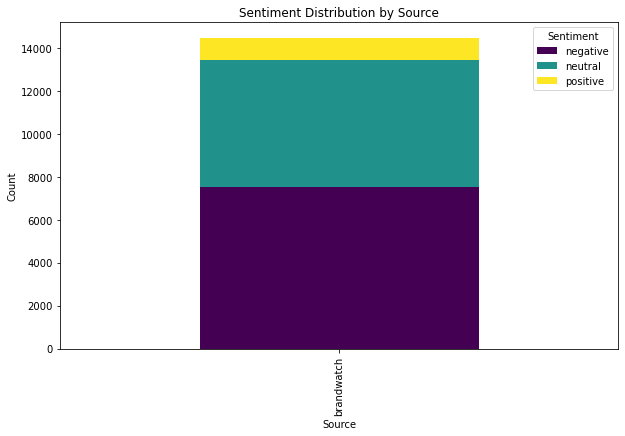

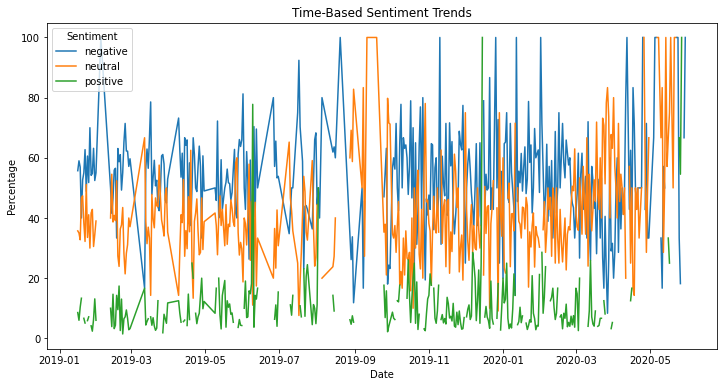

In [30]:
# 1. Sentiment Distribution
def plot_sentiment_distribution(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(x='predicted_sentiment', data=df, palette='viridis')
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

# 2. Sentiment by Topics
def plot_sentiment_by_topics(df):
    topic_sentiment = df.groupby(['Topic', 'predicted_sentiment']).size().unstack(fill_value=0)
    topic_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title('Sentiment by Topics')
    plt.ylabel('Count')
    plt.xlabel('Topic')
    plt.legend(title='Sentiment')
    plt.show()

# 3. Source-Based Sentiment Distribution
def plot_source_based_sentiment(df):
    source_sentiment = df.groupby(['Source', 'predicted_sentiment']).size().unstack(fill_value=0)
    source_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title('Sentiment Distribution by Source')
    plt.ylabel('Count')
    plt.xlabel('Source')
    plt.legend(title='Sentiment')
    plt.show()

# 4. Time-Based Sentiment Trends
def plot_time_based_sentiment(df):
    df = df.dropna(subset=['timestamp'])  # Ensure timestamps exist
    time_sentiment = df.groupby(df['timestamp'].dt.date)['predicted_sentiment'].value_counts(normalize=True).unstack() * 100
    time_sentiment.plot(figsize=(12, 6))
    plt.title('Time-Based Sentiment Trends')
    plt.ylabel('Percentage')
    plt.xlabel('Date')
    plt.legend(title='Sentiment')
    plt.show()

# Visualize All KPIs
print("Visualizing KPIs...")

plot_sentiment_distribution(df)        # 1. Sentiment Distribution
plot_sentiment_by_topics(df)           # 2. Sentiment by Topics
plot_source_based_sentiment(df)        # 3. Source-Based Sentiment Distribution
plot_time_based_sentiment(df)          # 4. Time-Based Sentiment Trends

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check available columns
print("Available columns:", df.columns)

# Convert timestamps for time-based trends
# df['timestamp'] = pd.to_datetime(df['Source Created At'], errors='coerce')

# 1. Sentiment Distribution
def plot_sentiment_distribution(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(x='predicted_sentiment', data=df, palette='viridis')
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

# 2. Sarcasm Analysis (Average Sarcasm Score)
def plot_sarcasm_analysis(df):
    sarcasm_avg = df['sarcasm_score'].mean()
    print(f"Average Sarcasm Score: {sarcasm_avg:.2f}")
    sns.histplot(df['sarcasm_score'], kde=True, bins=20, color='purple')
    plt.title('Sarcasm Score Distribution')
    plt.xlabel('Sarcasm Score')
    plt.ylabel('Frequency')
    plt.show()

# 3. Emotion Analysis
def plot_emotion_analysis(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(x='emotion', data=df, palette='coolwarm')
    plt.title('Emotion Distribution')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.show()

# 4. Topic Distribution
def plot_topic_distribution(df):
    topic_counts = df['Topic'].value_counts()
    topic_counts.plot(kind='bar', figsize=(10, 6), color='teal')
    plt.title('Topic Distribution')
    plt.xlabel('Topic')
    plt.ylabel('Count')
    plt.show()

# 5. Sentiment Accuracy (Confidence Level)
def plot_sentiment_accuracy(df):
    plt.figure(figsize=(8, 5))
    sns.histplot(df['confidence_level'], kde=True, bins=20, color='green')
    plt.title('Sentiment Prediction Accuracy')
    plt.xlabel('Confidence Level')
    plt.ylabel('Frequency')
    plt.show()

# 6. Geographical Insights
def plot_geographical_insights(df):
    geography_sentiment = df.groupby(['Geography', 'predicted_sentiment']).size().unstack(fill_value=0)
    geography_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
    plt.title('Geographical Insights on Sentiment')
    plt.xlabel('Geography')
    plt.ylabel('Count')
    plt.legend(title='Sentiment')
    plt.show()

# 7. Sarcasm and Sentiment Correlation
def plot_sarcasm_sentiment_correlation(df):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='predicted_sentiment', y='sarcasm_score', data=df, palette='coolwarm')
    plt.title('Sarcasm and Sentiment Correlation')
    plt.xlabel('Sentiment')
    plt.ylabel('Sarcasm Score')
    plt.show()

# 8. Topic-Wise Sentiment Breakdown
def plot_topic_sentiment_breakdown(df):
    topic_sentiment = df.groupby(['Topic', 'predicted_sentiment']).size().unstack(fill_value=0)
    topic_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
    plt.title('Topic-Wise Sentiment Breakdown')
    plt.xlabel('Topic')
    plt.ylabel('Count')
    plt.legend(title='Sentiment')
    plt.show()

# 9. Time-Based Sentiment Trends
def plot_time_based_trends(df):
    df = df.dropna(subset=['timestamp'])
    time_sentiment = df.groupby(df['timestamp'].dt.date)['predicted_sentiment'].value_counts(normalize=True).unstack() * 100
    time_sentiment.plot(figsize=(12, 6))
    plt.title('Time-Based Sentiment Trends')
    plt.xlabel('Date')
    plt.ylabel('Percentage')
    plt.legend(title='Sentiment')
    plt.show()

# Visualize All KPIs
print("Visualizing all KPIs...")




Available columns: Index(['Source Created At', 'Author ID', 'Tweet Text', 'Source', 'Language',
       'Longitude', 'Latitude', 'Tweet ID', 'Topic', 'Topic ID',
       'Ground Truth Topic', 'Sentiment', 'Sentiment ID',
       'Ground Truth Sentiment', 'cleaned_text', 'Tokenized Text',
       'sarcasm_score', 'sarcastic', 'predicted_sentiment', 'true_sentiment',
       'predicted_emotion', 'true_emotion', 'timestamp'],
      dtype='object')
Visualizing all KPIs...


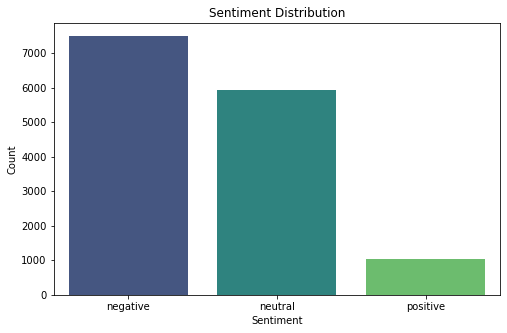

In [33]:
plot_sentiment_distribution(df)         # Sentiment Distribution


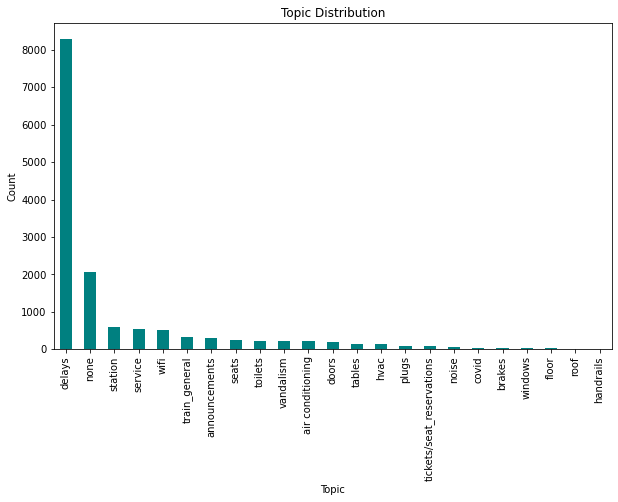

In [36]:
plot_topic_distribution(df)             # Topic Distribution


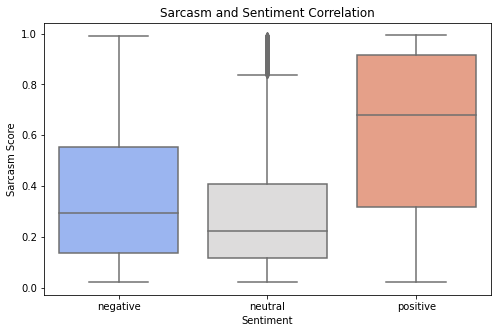

In [39]:
plot_sarcasm_sentiment_correlation(df)  # Sarcasm-Sentiment Correlation


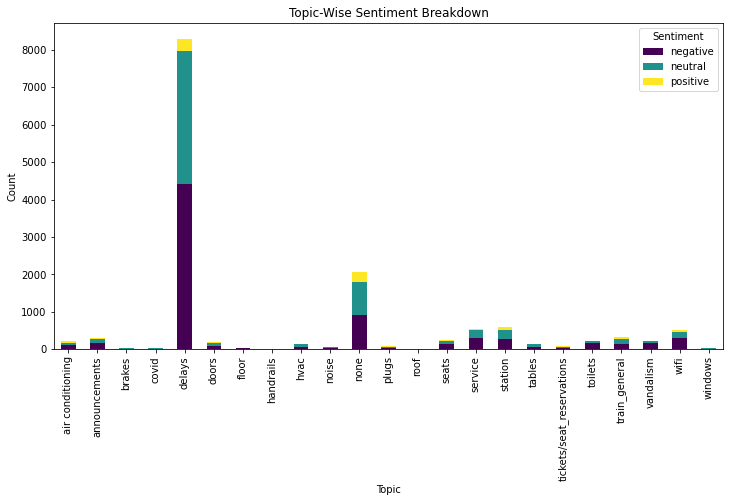

In [40]:
plot_topic_sentiment_breakdown(df)      # Topic-Wise Sentiment Breakdown


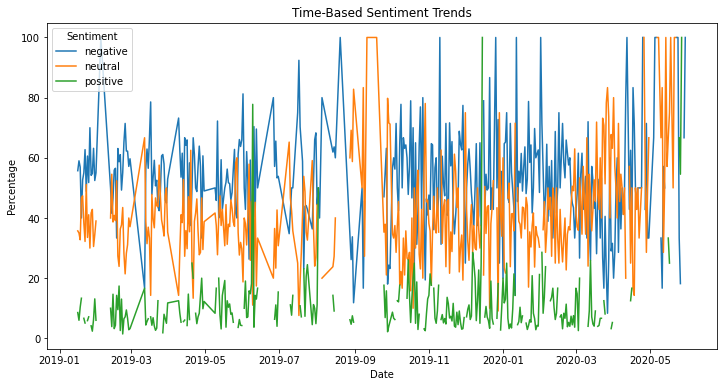

In [41]:
plot_time_based_trends(df)              # Time-Based Trends